In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
from math import factorial
import random
import math
from tqdm import tqdm
from datetime import datetime
import re

In [3]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [4]:
pd.set_option('display.max_rows', 20000)  
# печать всех строх, аналогично max_columns

# You can also reset an option back to its default value like this:
# pd.reset_option('display.max_rows')
# And reset all of them back:
# pd.reset_option('all')

In [21]:
df = pd.read_csv('qwe.csv')
df = df[df.hours.isna() == False] 
#df = df[df.send_datetime.isna() == False]

In [22]:
df['send_datetime'] = pd.to_datetime(df['send_datetime'])
df['send_datetime'] = df['send_datetime'] + pd.Timedelta(hours=3)
df['to_pick_time'] = pd.to_datetime(df['to_pick_time'])
df['to_pick_time'] = df['to_pick_time'] + pd.Timedelta(hours=3)


''

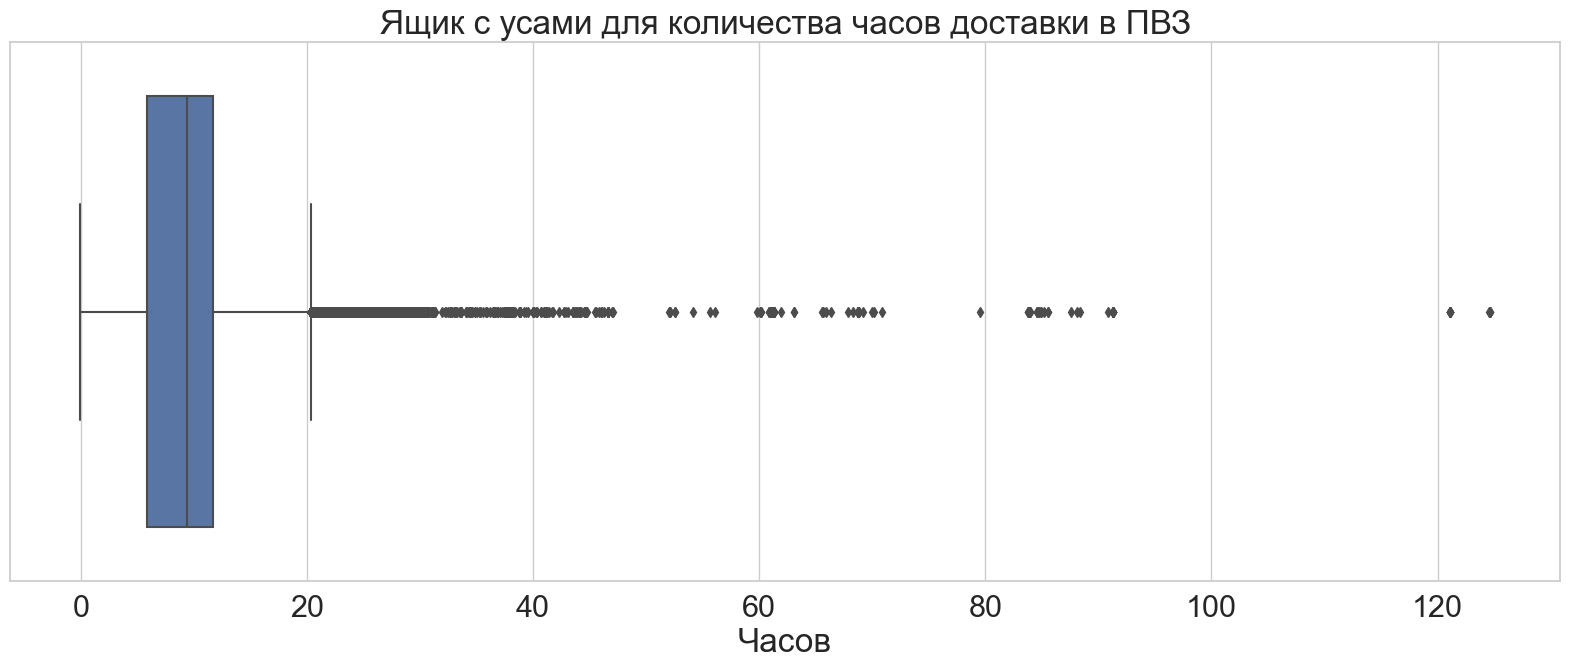

In [23]:
sns.boxplot(x='hours', data=df)
plt.title('Ящик с усами для количества часов доставки в ПВЗ')
plt.xlabel('Часов')
;

In [24]:
perc25 = df['hours'].quantile(25 / 100) 
perc75 = df['hours'].quantile(75 / 100) 
interq = 1.5 * (perc75 - perc25)

In [25]:
perc75 + interq

20.329382090625003

In [26]:
df[df.hours > perc75 + interq].shape[0] / df.shape[0] * 100

3.836102194846881

3.8% - Доля выбросов (выше 1.5 межквартильных размахов от 75 процентиля)  

In [27]:
percentiles = [10, 20, 30, 40, 50, 60, 70, 80, 90]
result = {x: df['hours'].quantile(x / 100) for x in percentiles}
result

{10: 3.1594823383611113,
 20: 5.069302654666667,
 30: 6.596295932583333,
 40: 8.131690315277778,
 50: 9.364315575694445,
 60: 10.298966634000001,
 70: 11.132383455694445,
 80: 12.363303586388891,
 90: 16.23421730761111}

Время доставки в часах, процентили

''

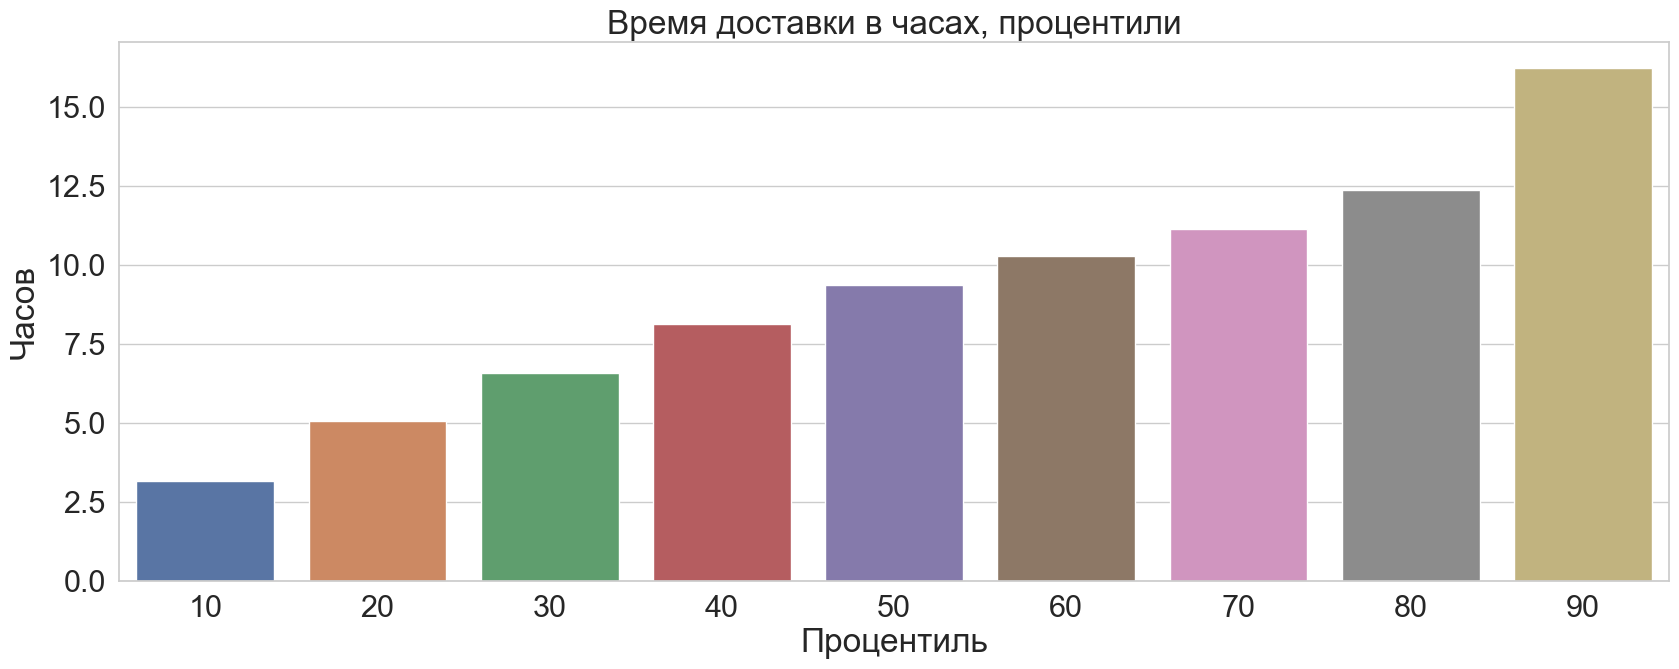

In [28]:
sns.barplot(x=list(result.keys()), y=list(result.values()))
plt.title('Время доставки в часах, процентили')
plt.xlabel('Процентиль')
plt.ylabel('Часов')
;

In [29]:
df['send_datetime_hour'] = df['send_datetime'].dt.hour
df['send_datetime_hour'] = df['send_datetime_hour'].astype(int)

In [30]:
hourly_grouped = df.groupby('send_datetime_hour', as_index=False).hours.median()

In [31]:
#hourly_grouped

''

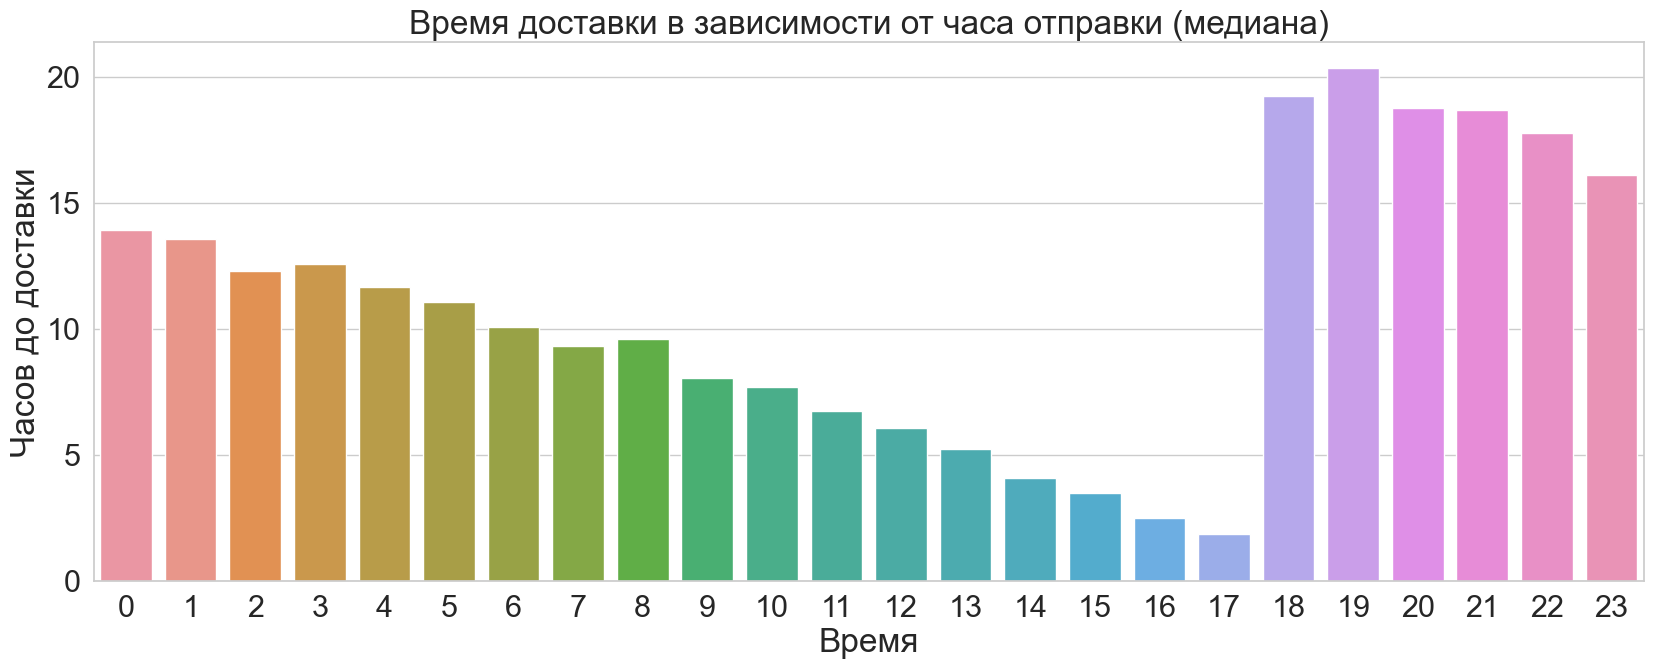

In [32]:
sns.barplot(x=hourly_grouped.send_datetime_hour, y=hourly_grouped.hours)
plt.title('Время доставки в зависимости от часа отправки (медиана)')
plt.xlabel('Время')
plt.ylabel('Часов до доставки')
;

In [33]:
hourly_grouped_num = df.value_counts('send_datetime_hour', normalize=True) *100

In [34]:
#hourly_grouped_num

''

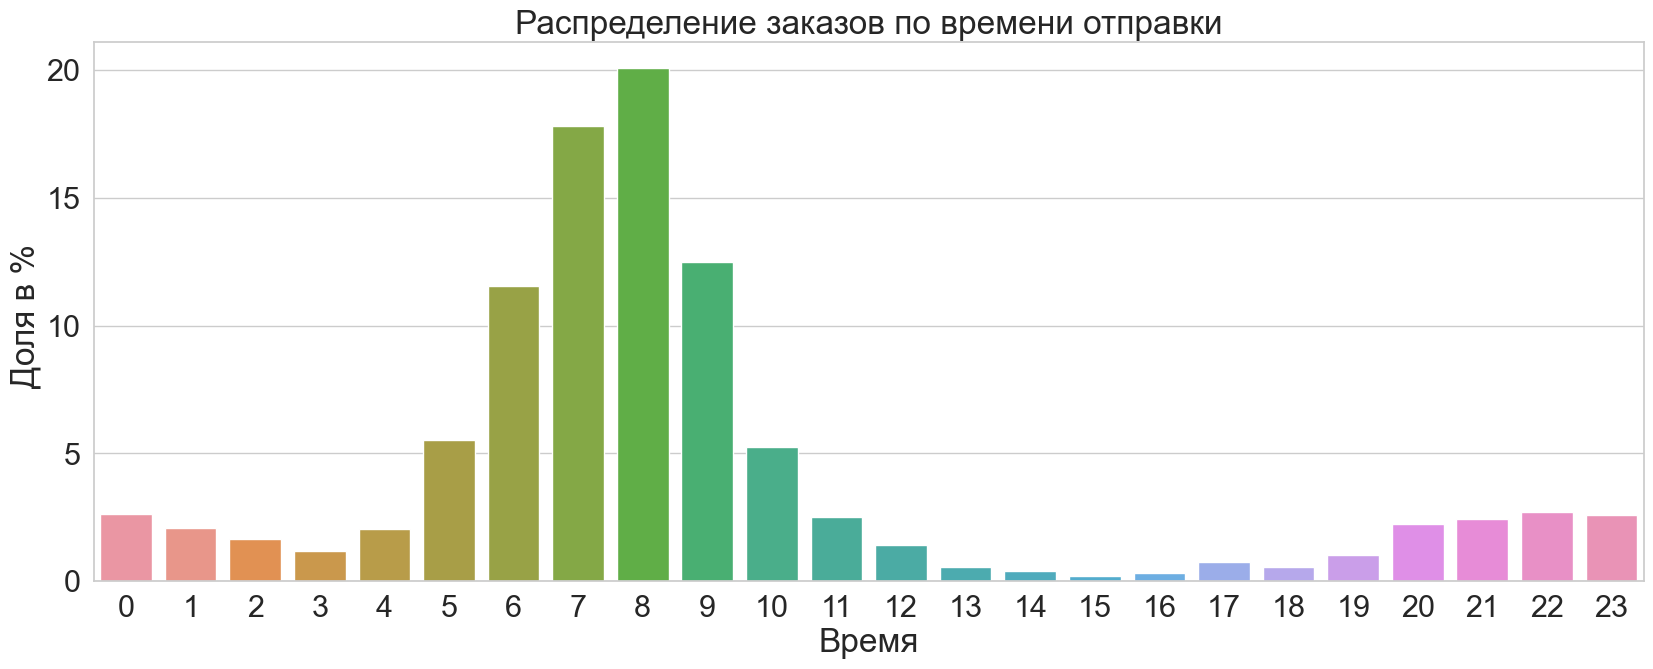

In [35]:
sns.barplot(x=hourly_grouped_num.index, y=hourly_grouped_num)
plt.title('Распределение заказов по времени отправки')
plt.xlabel('Время')
plt.ylabel('Доля в % ')
;